### 0. Fuentes del profesor

https://loe.org/images/content/091023/Zombie%20Publication.pdf - Paper de "When Zombies Attack" cuyo modelo debemos reproducir


http://thetortoiseslens.blogspot.com/2010/03/agent-based-computational-model-of.html - Modelacion de Agentes en Punto 5.1

### 1. Reproduccion del Modelo
En el artículo _WHEN ZOMBIES ATTACK!: MATHEMATICAL MODELLING OF AN OUTBREAK OF ZOMBIE INFECTION_ se muestra el modelado básico del modelo **SIR** para una epidemia. Reproduzca los modelos ahí presentados. 


##### Fuentes Adicionales: 
Teoricamente: https://complejidad.iiec.unam.mx/cursotaller2020/casos/modeloSIR.php

Implementacion en Python: https://blog.devgenius.io/pandemic-modeling-with-python-the-sir-model-16b5f8348e85

https://python.quantecon.org/sir_model.html

https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc?gi=7d6da078a7f7

https://www.cracked.com/article_18683_7-scientific-reasons-zombie-outbreak-would-fail-quickly.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp

In [ ]:
N = 1000
beta = 0.5  #Infeccion por encuentro
alfa = 0.7 #Tasa de muerte zombie (i.e., que tan probable es matar a un zombie en un encuentro con el)
zeta = 0.2 #que tan probable es que alguien que muere de S reviva como zombie
#asumimos que los Z no pueden volver a revivir como Z
rho = 1.0 # Cuanto tarda un infectado en volverse zombie

#tasas de cuarentena
kappa = 0 # de infectados
sigma = 0 # de zombies

#tasa de intento de escape
gamma = 0

#tasa de curacion
c = 0

delta = 0 # la tasa de muerte natural/por causas no directamente atribuibles a encuentro con zombie
pi = 0 #Tasa de nacimiento

S0, I0, R0 = 999, 1, 0  # Condiciones Iniciales: 1 infectado, resto suceptible

In [3]:
#El caso 1 es el caso basico

class ODEs:
    
    def __init__(self, beta, alfa, zeta, rho=0, kappa=0, sigma=0, gamma=0, c=0, delta=0, pi=0):
        self.beta = beta
        self.alfa = alfa
        self.zeta = zeta
        self.rho = rho
        self.gamma = gamma
        
        self.kappa = kappa
        self.sigma = gamma
        
        self.c = c

        self.delta = delta
        self.pi = pi  
    
    def ode_caso_basico(self, S, Z, R):
        dSdt = self.pi - (self.beta * S * Z) - (self.delta * S)
        dZdt = (self.beta * S * Z) + (self.zeta * R) - (self.alfa*S*Z)
        dRdt = (self.delta * S) + (self.alfa * S * Z) - (self.zeta*R)
        return dSdt, dZdt, dRdt
    
    def ode_caso_latente(self, S, Z, I, R):
        dSdt = self.pi - (self.beta * S * Z) - (self.delta * S)
        dIdt = (self.beta * S * Z) - (self.rho*I) - (self.delta*I)
        dZdt = (self.rho*I) + (self.zeta * R) - (self.alfa*S*Z)
        dRdt = (self.delta * S) + (self.delta * I) + (self.alfa * S * Z) - (self.zeta*R)
        return dSdt, dIdt, dZdt, dRdt
    
    def ode_caso_cuarentena(self, S, Z, I, R):
        dSdt = self.pi - (self.beta * S * Z) - (self.delta * S)
        dIdt = (self.beta * S * Z) - (self.rho*I) - (self.delta*I) - (self.kappa * I)
        dZdt = (self.rho*I) + (self.zeta * R) - (self.alfa*S*Z) - (self.sigma*Z)
        dRdt = (self.delta * S) + (self.delta * I) + (self.alfa * S * Z) - (self.zeta*R) + (self.gamma * Q)
        
        dQdt = (self.kappa * I) + (self.sigma * Z)  - (self.gamma*Q)
        
        return dSdt, dIdt, dZdt, dRdt, dQdt

    def ode_caso_tratamiento(self, S, Z, I, R):
        dSdt = self.pi - (self.beta * S * Z) - (self.delta * S) + (self.c * Z)
        dIdt = (self.beta * S * Z) - (self.rho*I) - (self.delta*I)
        dZdt = (self.rho*I) + (self.zeta * R) - (self.alfa*S*Z) - (self.c * Z)
        dRdt = (self.delta * S) + (self.delta * I) + (self.alfa * S * Z) - (self.zeta*R)
        
        return dSdt, dIdt, dZdt, dRdt
    
    
    def ode_ataques(self, Z, k, n):
        zombies_erradicados = k*n*Z
        return zombies_erradicados
        
        
    def ode_colateral_de_ataques(self, S, I, collateral, n):
        muertes_en_combate = collateral * n * (S+I)
        return muertes_en_combate

In [45]:
N = 1000
beta = 1  #Infeccion por encuentro
alfa = 0.2 #Tasa de muerte zombie (i.e., que tan probable es matar a un zombie en un encuentro con el)
zeta = 0.8 #que tan probable es que alguien que muere de S reviva como zombie
#asumimos que los Z no pueden volver a revivir como Z
rho = 1.0 # Cuanto tarda un infectado en volverse zombie
c = 8 #tasa de curacion

escenario_optimista = ODEs(beta=beta, alfa=alfa, zeta=zeta, c=c)


S=999
I=10
Z=10
R=0

cambio_en_S = 0
cambio_en_I = 0
cambio_en_Z = 0
cambio_en_R = 0
while(S >= 0 and Z >= 0):
    S += cambio_en_S
    I += cambio_en_I
    Z += cambio_en_Z
    R += cambio_en_R
    print("Humanos: ", S)
    print("Infectados: ", I)
    print("Zombies: ", Z)
    cambio_en_S, cambio_en_I, cambio_en_Z, cambio_en_R = escenario_optimista.ode_caso_tratamiento(S, Z, I, R)
    
    
    
    
    

Humanos:  999
Infectados:  10
Zombies:  10
Humanos:  -8911
Infectados:  10000
Zombies:  -20050.0


In [19]:
print(cambio_en_S)

-89.9


### 2. ¿Cuáles son las diferencias entre una epidemia normal (influenza, gripe, peste) y una epidemia zombie?


### 3.Criticas
Se han hecho muchas críticas al artículo (e.g. _Zombie Apocalypse: An Epidemic Model_) indicando que hay errores y que las gráficas no corresponden ¿Es cierto? Si es afirmativa la respuesta, ¿Cuáles son esos errores?

## Le faltaron algunos casos: 

### El caso del tratamiento con inmunidad

### Las muertes colaterales cuando se ataca a los zombies

###  

### 4. Upgrades
De la presentación _Zombie Apocalypse: An Epidemic Model_ se presentan varios `upgrades`, desarróllalos y coméntalos ¿Por qué son `upgrades`? ¿Qué mejoras proponen?


### 5.1 **Agentes** 
Use la clase agente para modelar una epidemia Zombie como se describe en [Agent-Based Computational Model of Humanity’s Prospects for Post Zombie Outbreak Survival](http://thetortoiseslens.blogspot.mx/2010/03/agent-based-computational-model-of.html). Utiliza el diagrama del artículo _SimZombie: A Case-Study in Agent-Based Simulation Construction_ como guía.

In [1]:
import random
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [122]:
#Aqui el mundo sin cambiar de la clase
class Mundo:
    def __init__(self, agentes, ancho=8, alto=8, steps = 20):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


In [123]:
class Mundo_apocaliptico(Mundo):
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='black', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='grey', **plot_args)
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        return 
    
    def dibujar(self,step):
   
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
    
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 'Zombie':
                x_values_0.append(x)
                y_values_0.append(y)
            else:
                x_values_1.append(x)
                y_values_1.append(y)

                
        self.puntos_0.set_data(x_values_0, y_values_0)
        self.puntos_1.set_data(x_values_1, y_values_1)
        
        self.ax.set_title('Paso {}'.format(step))

        return 

In [124]:
class Agente:
    """ Agente general """
    def __init__(self, tipo):
        self.tipo = tipo
    def distancia(self, otro):
        pass
    def actuar(self, agentes):
        pass
        
    def decidir(self, agentes):
        pass
    def actualizar(self, agentes):
        pass

In [125]:
class Zombie:
    def __init__(self,locacion, tipo, delta=0.9, rango=0.15, punto_seguro1=np.array((0.2,0.8)), 
                 punto_seguro2= np.array((0.8,0.2))):
        Agente.__init__(self, tipo)
        self.tipo = 'Zombie'
        self.delta = delta # Tamaño de paso en x y y
        self.rango = rango #rango de persepcion
        self.locacion = locacion
        self.punto_seguro1 = punto_seguro1
        self.punto_seguro2 = punto_seguro2
        self.prob_muerte = 0
        self.muerto = False
        self.en_rango = False
        self.siguiente_accion = None 
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
        
    def actuar(self, agentes):
        self.morir(agentes)
        if self.muerto == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            agentes.remove(self)
            
    def peligro(self, agentes):
        distancia_punto_seguro1 = np.linalg.norm(self.locacion - self.punto_seguro1)
        distancia_punto_seguro2 = np.linalg.norm(self.locacion - self.punto_seguro2)
        if distancia_punto_seguro1 < 0.2 or distancia_punto_seguro2 < 0.2:
            self.prob_muerte=0.2
        elif distancia_punto_seguro1 < 0.1 or distancia_punto_seguro2 < 0.1:
            self.prob_muerte= 0.4
        elif distancia_punto_seguro1 < 0.05 or distancia_punto_seguro2 < 0.05:
            self.prob_muerte= 0.7
        
    def morir(self, agentes):
        self.peligro(agentes)
        if random.random() < self.prob_muerte:
            self.muerto = True
                
    def decision(self, agentes):
        """Verdadero si un humano esta en rango"""
        distancias = []
        for agente in agentes:
            if self.tipo != agente.tipo:
                distancia = self.distancia(agente)
                distancias.append(distancia)
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        #Checar si el humano más cercano esta en rango de persecucion
        if distancias[0] <= self.rango:
            self.en_rango = True
            self.siguiente_accion = self.persecucion(agentes)
        else:
            self.siguiente_accion = np.array([random.uniform(-0.1, 0.1), random.uniform(-0.1,0.1)])
            
    def persecucion(self, agentes): 
        distancias = []
        distyPresa = []
        # DistyPresa es una lista de pares (distancia, agente)
        for agente in agentes:
            if self.tipo != agente.tipo:
                distancia = self.distancia(agente)
                distancias.append(distancia)
                distyPresa.append([distancia, agente])
        # Ordenamos del más cercano al más lejano 
        distancias.sort()
        for presax in distyPresa:
            if presax[0] == distancias[0]:
                presa = presax[1]
        direccion_a_tomar = presa.locacion - self.locacion
        return direccion_a_tomar
    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

In [126]:
class Humano:
    def __init__(self, tipo, delta=0.1, rango=5, punto_seguro1=np.array((0.2,0.8)), 
                 punto_seguro2= np.array((0.8,0.2))):
        Agente.__init__(self, tipo)
        self.tipo = 'Humano'
        self.delta = delta # Tamaño de paso en x y y
        self.locacion = np.array((random.uniform(0.1,0.9), random.uniform(0.1,0.9)))
        self.siguiente_accion = None 
        self.muerto = False
        self.rango_supervivencia = 0.01
        self.punto_seguro1 = punto_seguro1
        self.punto_seguro2 = punto_seguro2
        
    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  
    
    def actuar(self, agentes):
        self.morir(agentes)
        if  self.muerto == False:
            self.locacion = self.locacion + self.siguiente_accion*self.delta
        else:
            self.tipo = 'Zombie'
            agentes.extend([Zombie(locacion = self.locacion, tipo='Zombie')])
            agentes.remove(self)
        
    def decision(self, agentes):
        """Ver que punto seguro es el más cercano"""
        # Distancias es la lista del humano al punto seguro)
        if self.muerto == False:
            distancias = []
            distancia1 = np.linalg.norm(self.locacion - self.punto_seguro1)
            distancia2 = np.linalg.norm(self.locacion - self.punto_seguro2)
            distancias.append((distancia1, self.punto_seguro1))
            distancias.append((distancia2, self.punto_seguro2))
            distancias.sort()
            direccion = distancias[0][1] - self.locacion
            self.siguiente_accion = direccion 
            
    def morir(self,agentes):
        for agente in agentes:
            zombies = []
            if agente.tipo != self.tipo:
                zombies.append(agente)
            for zombie in zombies:
                distZ = self.distancia(zombie)
                if (distZ <= self.rango_supervivencia).all():
                    self.muerto = True
                    
    def actualizar(self, agentes):
        self.decision(agentes)
        self.actuar(agentes)

Creado el mundo


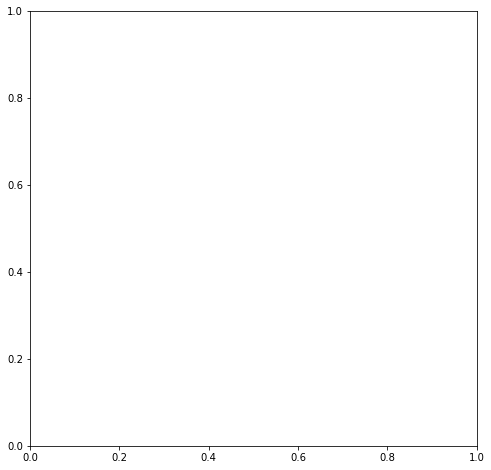

In [127]:
num_tipo_0 = 150
num_tipo_1 = 1

agentes = [Humano(tipo='Humano') for i in range(num_tipo_0)]
agentes.extend(Zombie(tipo='Zombie',locacion=np.array((0.5,0.5))) for i in range(num_tipo_1))


Mundo = Mundo_apocaliptico(agentes = agentes, steps = 30)

simu_Zombie = Mundo.simular()

In [128]:
HTML(simu_Zombie.to_html5_video())

### 5.2 **Agentes** 
Use la clase agente para modelar una epidemia Zombie como se describe en [Zombie Infection Simulator](http://asymptote.wordpress.com/2008/01/13/asymptotes-zombie-infection-simulator/) (Esta incluye humanos que pelean  y humanos en pánico)

7: Zombies have too many natural predators. Humans are only at the top of the food chain because of our intelligence. Zombies don't have that advantage, so any animal could easily kill a zombie (stray dogs, bears, ect.) Plus, insects.

6: They can't take the heat The natural decaying process, exasperated by the daily heat, would cause zombies to basically explode from gas build up. Also, zombies would dry up in dry heat like "slim jims".

5: They can't take the cold The water in the zombie's bodies would freeze if temps outside reached below the freezing mark. This would make the zombies immobile.

4: Biting is a terrible way to spread disease Infectious diseases which spread via biting have a terrible track record. Look at how rare rabies is. It's to obvious a way to spread disease, and the authorities would be able to quarantine, or execute, the infected quickly.

3: They can't heal from day to day damage Zombies aren't alive, so their body won't heal. Basic wounds would accumulate and destroy the body quite quickly.

2: The landscape is full of zombie proof barriers If the zombies can only travel on foot it'll be hard to see widespread, rapid spreading of the disease. Zombies would either walk off cliffs or similar large drops, or would be corralled into small enough areas by these landmarks to allow mass killings of the infected.

1: Weapons and the people who use them Lot of armed people in the States. 14 million people with a hunting license alone. Millions more that have weapons without licenses. The military is suited to take down very large numbers of zombies without getting close enough to get bitten. Zombies have to come in contact with a person to spread their disease, which makes them susceptible to being killed every time they want to claim a new victim.

### 6. Preguntas Extras

#### 6.1 ¿Cómo modelarías una infección de hombres lobos?
    - Tip: Necesitas llevar el paso del tiempo

#### 6.2 Implementa el agente hombre-lobo

#### 6.3 Discute el ejemplo de [z0mb1e](http://www.elliemary.com/agent-based-zombie-model.html), es una de las simulaciones más completas. ¿Qué hay de diferente a la tuya?

#### 6.4 Desarrolla el agente descrito en ese artículo.


#### 6.5 Desarrolla una simulación de dicho artículo.